### Dimensionality Reduction 降维

In [1]:
import scanpy as sc

sc.settings.verbosity = 0
sc.settings.set_figure_params(
    dpi=80,
    facecolor="white",
    frameon=False,
)

In [2]:
adata = sc.read(
    filename="s4d8_feature_selection.h5ad",
)
adata

AnnData object with n_obs × n_vars = 14814 × 20171
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', 'scDblFinder_score', 'scDblFinder_class', 'size_factors'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_deviant', 'binomial_deviance'
    layers: 'analytic_pearson_residuals', 'counts', 'log1p_norm', 'scran_normalization', 'soupX_counts'

In [3]:
adata.X = adata.layers["log1p_norm"]

### PCA

In [4]:
# setting highly variable as highly deviant to use scanpy 'use_highly_variable' argument in sc.pp.pca
adata.var["highly_variable"] = adata.var["highly_deviant"]
sc.pp.pca(adata, svd_solver="arpack", use_highly_variable=True)

e:\Anaconda\envs\scai\lib\site-packages\scanpy\preprocessing\_pca.py:377: FutureWarning: Argument `use_highly_variable` is deprecated, consider using the mask argument. Use_highly_variable=True can be called through mask_var="highly_variable". Use_highly_variable=False can be called through mask_var=None
  warn(msg, FutureWarning)


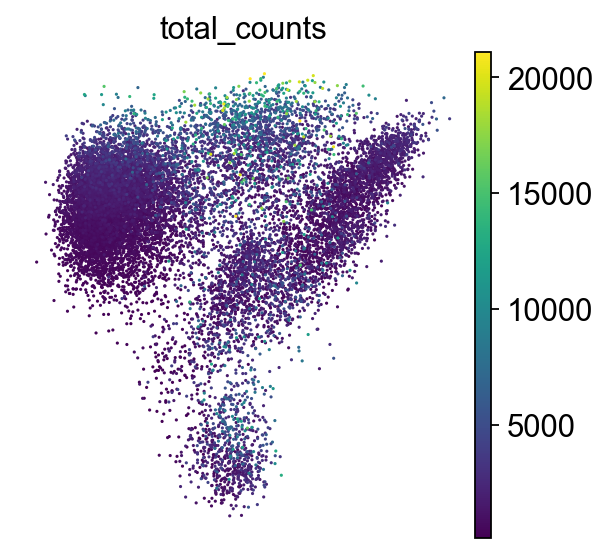

In [5]:
sc.pl.pca_scatter(adata, color="total_counts")

### t-SNE

In [6]:
sc.tl.tsne(adata, use_rep="X_pca")

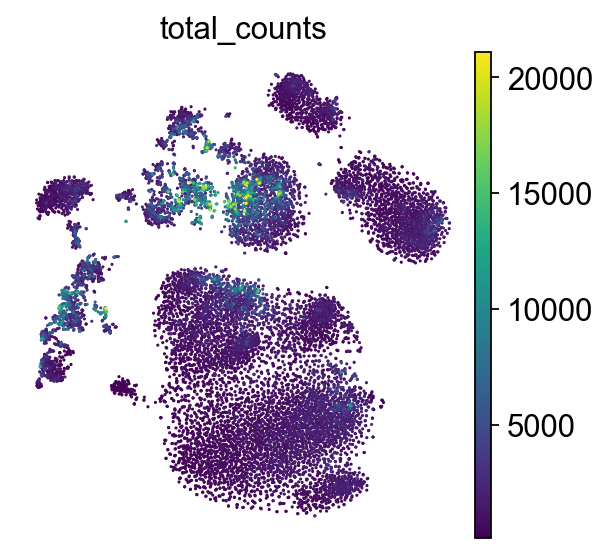

In [7]:
sc.pl.tsne(adata, color="total_counts")

### UMAP

In [8]:
sc.pp.neighbors(adata)
sc.tl.umap(adata)

e:\Anaconda\envs\scai\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


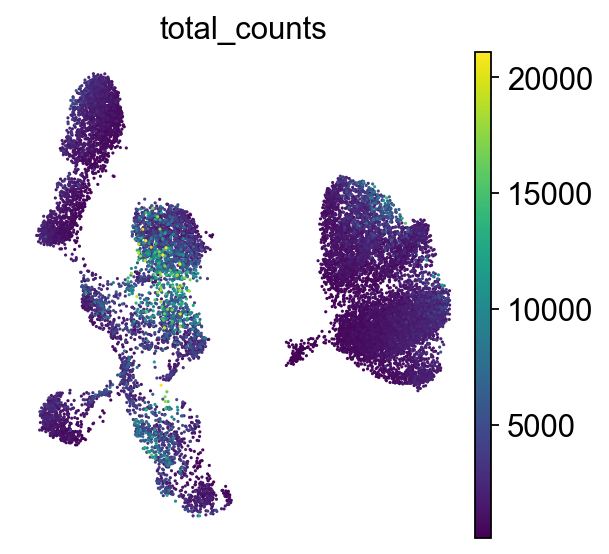

In [9]:
sc.pl.umap(adata, color="total_counts")

### 检查质量控制指标

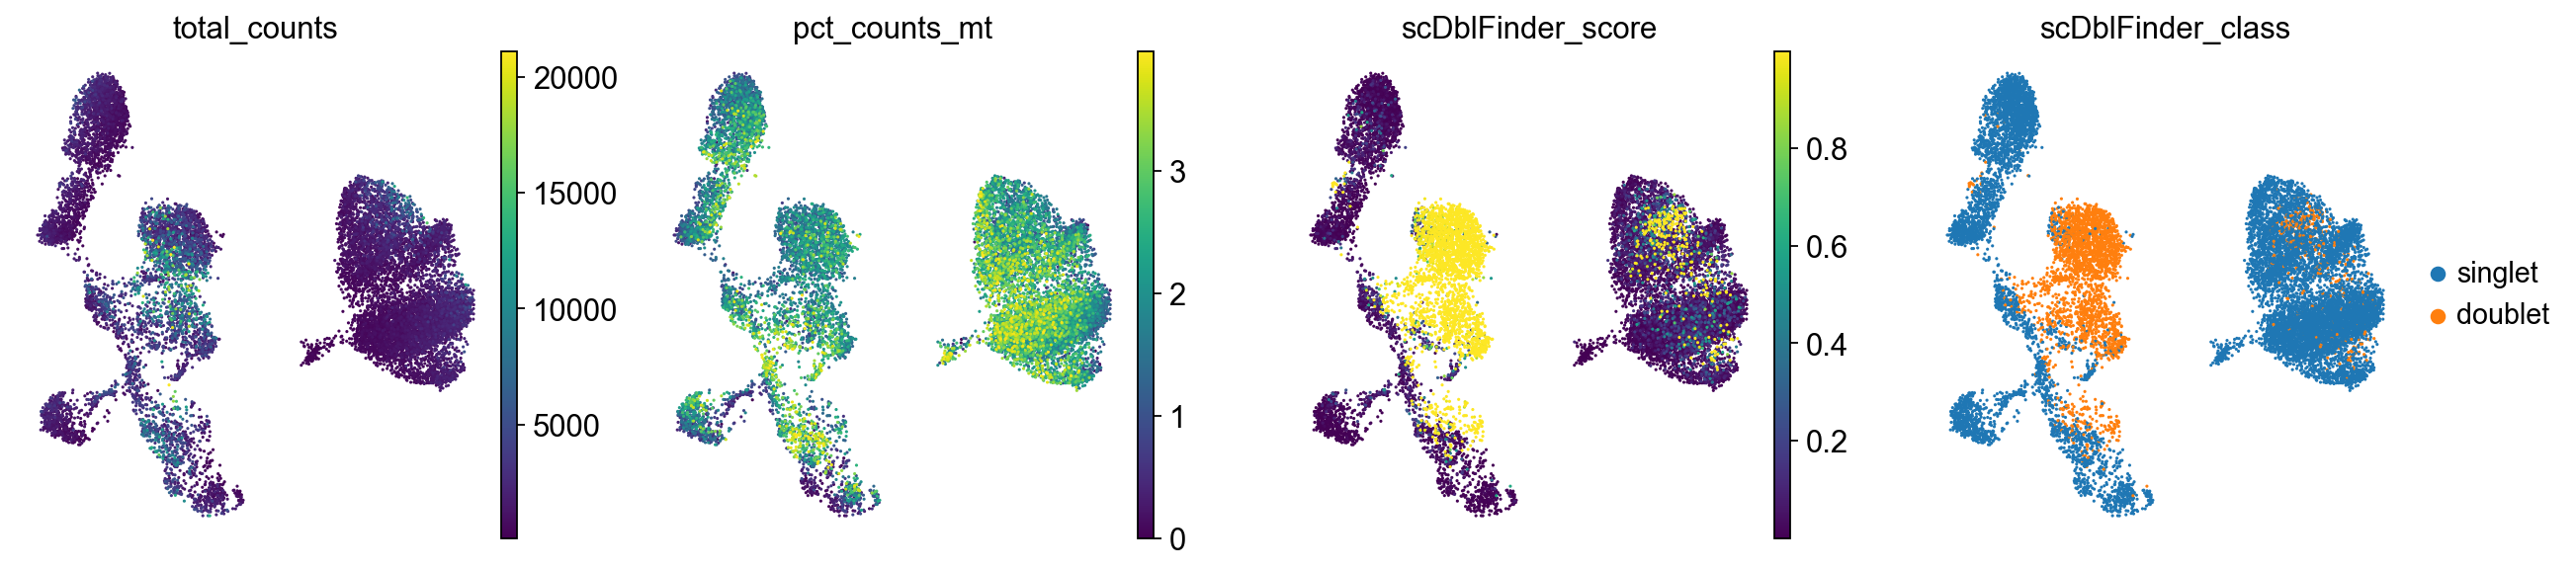

In [10]:
sc.pl.umap(
    adata,
    color=["total_counts", "pct_counts_mt", "scDblFinder_score", "scDblFinder_class"],
)